# 대구 지하철 유실물 현황 조사

In [47]:
# 모듈 구동 ------------------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 Font 설정 -------------------------------------------------
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path = '../Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [48]:
# 파일 관련 변수 선언 ---------------------------------------------------------------------
DIR_PATH = './lostdata/'
FILE = DIR_PATH + '대구도시철도공사_고객소리.csv'

# DF객체로 xml파일 읽어오기 --------------------------------------------------------------
xmlDF=pd.read_xml('./lostdata/lostInfo.xml', xpath="//apiData")
xmlDF

,type,regName,regCategory,regTitle,regPickingPlace,regKeepingplace,regPickingDate
0,lostInfoVO,None,기타,"검정색 카드 지갑(신분증2, 카드3)",1반월당역 상가 통로,유실물센터,2022-07-05
1,lostInfoVO,None,기타,"지갑, 현금, 신분증",#1077,None,2022-06-15
2,lostInfoVO,None,기타,검정색 장지갑,#1248,중부경찰서생활질서계,2022-06-11
3,lostInfoVO,None,기타,검정색 카드지갑,반월당역 안심행 벤치,중부경찰서생활질서계,2022-05-26
4,lostInfoVO,None,노트북,삼성노트북,#1038,유실자 반환,2022-05-11
...,...,...,...,...,...,...,...
3594,lostInfoVO,제1영업소,카메라,디지털카메라,상인역 남자 화장실,달서경찰서생활질서계,2005-10-30
3595,lostInfoVO,제1영업소,시계,시계,다사역 상선승강장,달성경찰서생활질서계,2005-10-28
3596,lostInfoVO,제1영업소,전자제품,휴대폰 애니콜 은색,죽전역 승강장,달서경찰서생활질서계,2005-10-27
3597,lostInfoVO,제1영업소,귀금속,진주목걸이,전동차내,달성경찰서생활질서계,2005-10-27


In [49]:
# 읽어온 파일 정보 확인 -------------------------------------------------------------------
xmlDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             3599 non-null   object
 1   regName          1190 non-null   object
 2   regCategory      3571 non-null   object
 3   regTitle         3599 non-null   object
 4   regPickingPlace  3579 non-null   object
 5   regKeepingplace  3484 non-null   object
 6   regPickingDate   3599 non-null   object
dtypes: object(7)
memory usage: 196.9+ KB


In [50]:
# 필요 없는 칼럼 삭제 ---------------------------------------------------------------------
lostDF = xmlDF.drop(['type', 'regName','regPickingPlace'], axis=1)

# 2018년도 (최근 5년)이후 행만 추출 -------------------------------------------------------
lostDF = lostDF.iloc[:594,:]

In [51]:
# 카테고리 미분류, 발견장소 Nan 행 삭제 ---------------------------------------------------
lostDF.dropna(axis=0, how='any')
lostDF.rename(columns = {'regCategory':'유실물 종류', 'regTitle':'유실물','regKeepingplace':'인수장소', 'regPickingDate':'발견 일자'}, inplace = True)

In [52]:
# 유실물 종류 확인 
lostDF['유실물 종류'].value_counts()

기타       342
현금        79
휴대용기기     73
가방        53
시계        14
노트북       10
의류         9
귀금속        6
카메라        4
전자제품       2
Name: 유실물 종류, dtype: int64

## 유실물을 종류별로 나누었을때 기타에 포함된 것이 무엇일까

In [53]:
# 기타에 해당하는 유실물 확인 ------------------------------------------------------------
loste = lostDF[lostDF['유실물 종류'] == '기타']
loste['유실물'].unique()

array(['검정색 카드 지갑(신분증2, 카드3)', '지갑, 현금, 신분증', '검정색 장지갑', '검정색 카드지갑',
       '지갑, 현금', '지갑(루이까또즈 지갑)', '체크무늬 반지갑', '검정색 지갑', '지갑1, 카드2, 현금',
       '카드지갑', '지갑', '카드지갑1, 카드2, 현금', '카드지갑1, 신분증2, 카드2',
       '가방,현금,상품권(33만원),통장4,카드13,신분증2',
       '지갑(카드10, 복지카드1,여권1,주민등록증1,운전면허증1,외국인등록증1', '지갑,현금,신분증,신용카드,티머니카드',
       '생로랑카드지갑1,신용카드3,신분증1,증명사진1', '지갑, 신분증, 카드2, 현금',
       '지갑, 신분증, 진료증, 카드3, 헌혈증2', '지갑, 카드5, 신분증3, 현금',
       '지갑1,신분증1,카드9,2달러,우표2,유심1,sd카드1,현금', '지갑,신분증,카드3',
       '지갑, 현금, 신분증, 카드7', '지갑, 복지카드, 카드2', '카드지갑, 카드2',
       '지갑, 신분증, 카드3, 도서교환권 2000원', '지갑1,상품권1,식권3,카드3,신분증1,현금',
       '지갑1,외화3,카드4,신분증1', '지갑,신분증', '지갑, 현금. 카드2, 1달러',
       '지갑, 진료카드, 현금, 온누리상품권 10만원', '지갑,카드2,신분증,현금,복권4',
       '검정지갑, 카드2, 현금,1달러', '지갑,외국인등록증,운전면허증,현금,카드3',
       '동전지갑(검정색), 현금, 신분증, 우대교통카드', '검정색 지갑,신분증2,자격증,카드6',
       '지갑, 신분증, 기자증, 현금, 카드3', '지갑,신분증,카드,현금,4달러,베트남돈(243,000)',
       '지갑, 신분증2, 교육이수증, 카드3, 상품교환권', '지갑, 카드3, 현금',
       '지갑, 신분증3, 카드8, 헌혈증서4', '지갑, 신분증3, 카드3', '

## 기타에 포함된 종류 ==> 다양한 지갑 종류

In [54]:
# 유실물 '기타'를 '지갑'으로 변경 ------------------------------------------------------------------------
lostDF.loc[lostDF['유실물 종류'] == '기타', '유실물 종류'] = '지갑'

# 유실물 종류별 개수 조회
lost = lostDF['유실물 종류'].value_counts()

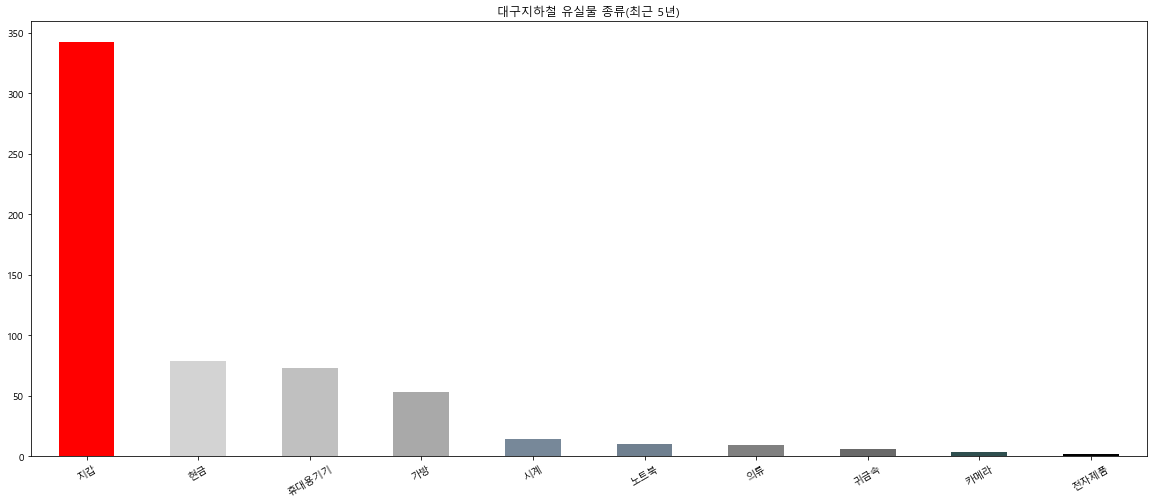

In [55]:
# 유실물 종류별 건수 그래프 도출
colors = ['red', 'lightgrey','silver','darkgray','lightslategray','slategray','gray','dimgray','darkslategray','black']

# 차트 시각회
plt.figure(figsize=(20,8))
lost.plot(kind='bar', title='대구지하철 유실물 종류(최근 5년)', color = colors)

# x축 글자 기울기 조절
plt.xticks(rotation=30)
plt.show()

## 유실물은 지갑, 현금, 휴대용기기 순으로 많다.
    
    - 고객의 유실물은 어디로가나?
    - 유실자에게 반환되는 건수 조회

In [56]:
# 인수장소 컬럼 조회
lostDF['인수장소'].value_counts()

유실자 반환          297
중부경찰서생활질서계      228
수성경찰서생활질서계       18
달서경찰서생활질서계       10
동부경찰서생활질서계        4
반월당1역             3
성서경찰서생활질서계        3
남부경찰서생활질서계        3
북부경찰서생활질서계        2
달성경찰서(화원파출소)      2
유실물센터             2
대구역역              1
강북경찰서생활질서계        1
기타                1
정평역               1
대실역               1
신천역               1
경산경찰서(중앙파출소)      1
만평역               1
Name: 인수장소, dtype: int64

In [57]:
# 인수장소 조회
df = lostDF['인수장소'].value_counts()
df = df.reset_index()
df.columns= ['인수장소', '건수']
df

,인수장소,건수
0,유실자 반환,297
1,중부경찰서생활질서계,228
2,수성경찰서생활질서계,18
3,달서경찰서생활질서계,10
4,동부경찰서생활질서계,4
5,반월당1역,3
6,성서경찰서생활질서계,3
7,남부경찰서생활질서계,3
8,북부경찰서생활질서계,2
9,달성경찰서(화원파출소),2


## 대구 지하철 고객 소리 조사

- 대구지하철 고객서비스에 대한 고객의견 조사

In [58]:
# 고객소리건수 파일 불러오기
customer = pd.read_csv(FILE, encoding='euc-kr')

In [59]:
print(customer.info())
customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   분야      43 non-null     object 
 1   상세분야    43 non-null     object 
 2   등록      31 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB
None


,분야,상세분야,등록
0,운수영업,운임제도,6.0
1,운수영업,이용질서,18.0
2,운수영업,승차권,1.0
3,운수영업,친절,29.0
4,운수영업,불친절,NaN
5,운수영업,행선지안내,6.0
6,운수영업,유실물,53.0
7,운수영업,이용안내,8.0
8,운수영업,부정승차,2.0
9,운수영업,임대사업,NaN


In [60]:
# 고객 소리 중 등록 없는 분야 삭제
customer.dropna(axis=0, how='any',inplace=True)


# 유실물이 속해있는 운수영업 분야만 추출
customer = customer.loc[:10,'상세분야':]
customer.set_index('상세분야').transpose()

상세분야,운임제도,이용질서,승차권,친절,행선지안내,유실물,이용안내,부정승차
등록,6.0,18.0,1.0,29.0,6.0,53.0,8.0,2.0


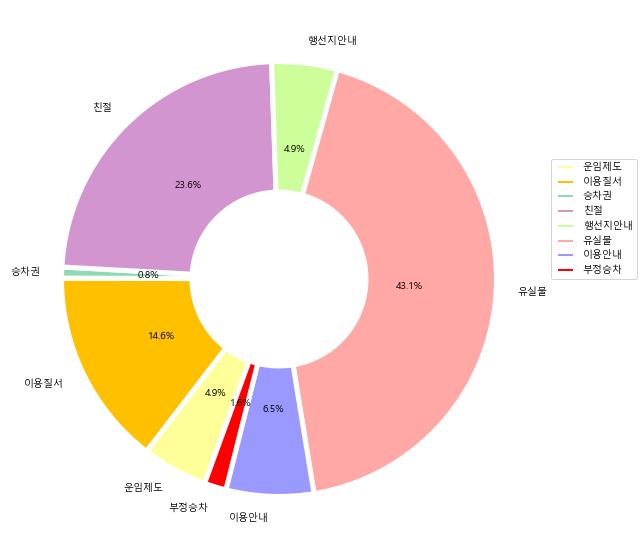

In [61]:
# 운수영업(서비스)부문 그래프 도출
data = customer['등록']
labels = ['운임제도','이용질서','승차권','친절','행선지안내','유실물','이용안내','부정승차']
colors = ['#ffff99', '#ffc000', '#8fd9b6', '#d395d0', '#ccff99','#ffa8a6','#9999ff','red']
wedgeprops = {'width':0.6, 'edgecolor':'w', 'linewidth':5}
plt.figure(figsize=(10,10))
plt.pie(data, labels=labels, autopct='%.1f%%', startangle=250, counterclock=False,
        colors=colors, wedgeprops=wedgeprops)
plt.legend(loc = (1, 0.5))
plt.show()